In [0]:
from IPython.display import Image
from IPython.display import HTML
from IPython.display import YouTubeVideo


In [0]:
from google.colab import files
uploaded = files.upload() #coll_filt.png  movies.csv  perform.csv	ratings.csv similarity.png

Saving coll_filt.png to coll_filt.png


# Collaborative Filtering: Matrix Factorization Recommender System 
## Introduction 
This article targets anyone with previous exposure to machine learning but with little to no knowledge of the recommendation systems. However, it is highly probable that anyone interested in this work interacts with a recommender system regularly. Anyone who listens to Spotify or watches movies on Netflix benefits from the rigorous algorithms (recommendation systems) developed by teams of data scientists and software engineers. The theoretical part of the article explains the fundamentals of various recommendation systems. The practical section emphasizes practical usage of collaborative filtering while utilizing Surprise package and movie-lense data set. Specifically, the author creates two recommender systems utilizing i.) Singular Value Decomposition (SVD), ii.) Non-negative Matrix Factorization (NMF). Both models evaluate/determine users' preferences based on principles of linear algebra.

# Theoretical Part
## Basics of The Recommender System
The reason why consumers need reliable recommendations is straightforward: Given the availability of almost unlimited number of choices (e.g. different movie genres of various quality),  and the natural tendency of human is to maximize his/her utility, the user needs guidance to the next best item that accommodates his/her needs or preferences. Specifically, Netflix has become so popular because of its capability to suggest the user a next movie (from thousands of other options) that matches to the best of user's taste.


## Types of the Systems
There are many ways and complex algorithms used to build a recommender system. The following are fundamental approaches. While reading, the reader should think which one may be **the most effective method** when it comes to a movie recommendation.
 
 
* **The Most Popular Item**: It is the simplest strategy and requires no coding skills. It works based on the assumption that the most popular item attracts most consumers or most users. For example, any consumer shopping on Amazon would see the most frequently bought items. Conversely, Netflix would recommend every user the most popular movie in its list.
 
* **Association & Market Based Model:** The system makes recommendations based on the items in the consumer's basket. For instance, if the system detected that the buyer is purchasing ground coffee it would also suggest her to buy filters as well (observed association coffee - filters).
 
* **Content Filtering:** Uses metadata to determine the user's taste. For example, the system recommends the user movies based on their preferences of genres, actors, themes, etc. Such a system matches the user and the item based on similarity. For example, if the user watched and liked Terminator and Predator (both action movies with Arnold Schwarzenegger in the main role), it would probably recommend them to watch Commando.
 
* **Collaborative Filtering (CF):** It is an algorithmic architecture that recommends consumers items based on their observed behavior. There are two types of Collaborative Filtering frameworks: **Model-Based Approach** and **Memory-Based Approach**:
 
 * **User-based (UBCF):** It is a predecessor of Item-based CF. UBCF makes recommendations based on the user's characteristics that are similar to other users in the system. For example, if the end-user positively rates a movie, the algorithm finds other users who have previously rated the movie too, i.e. these users are similar to one another. In the next step, the system recommends the user an unseen movie but highly rated by other - referenced - users. See Figure 1.
 
 * **Item-based (IBCF):** IBCF was originally developed by Amazon and is currently adopted by most online corporations (e.g. Netflix, YouTube, etc.).
 
* **Hybrid Models:** As the name suggests, the Hybrid Models combine two or more recommendation strategies. For instance, a Hybrid Content-Collaborative System can recommend the user a movie based on their gender but still focuses on the movie features the user exhibits to prefer. 
 
*While **Hybrid Models** logically appear to be the most effective ones, **Netflix's recommendation engine is based on the assumption that similar users like and dislike similar items**; i.e. **Collaborative Filtering** is the key to Netflix's success. 
 
Both the SVD and NMF models trained in the article are classified as IBCF. **Note that the performance of these models do not meet industry standards. With recent advances in deep learning, online users currently encounter recommendations trained with various types of (hybrid) neural networks (e.g. MLP, CN, RNN, etc.)**. If the reader is interested in a new perspective and the most advanced models used by the giant online corporations, [*Deep Learning based Recommender System: A Survey and New Perspectives*](https://arxiv.org/abs/1707.07435) by Zhang et al. provides a complex overview of up-to-date development in this field.

##User-based (UBCF)

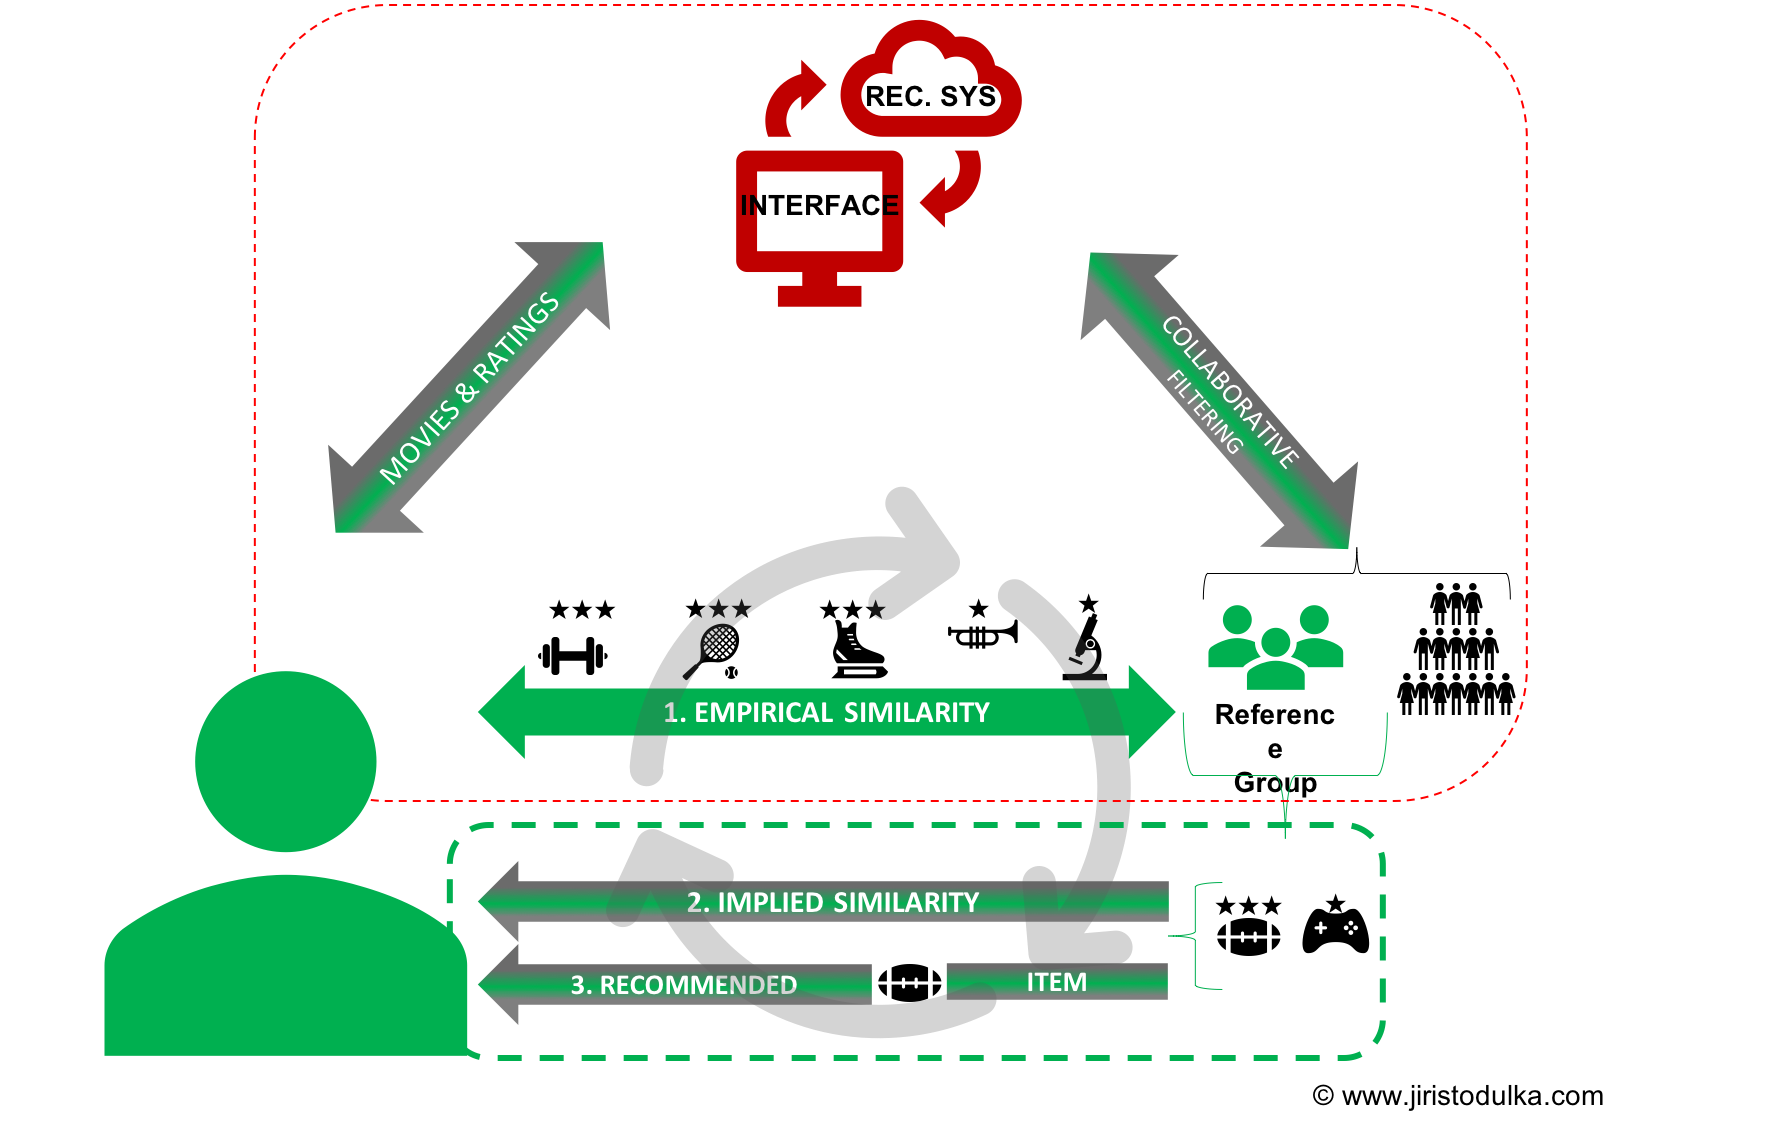

In [0]:
# Figure 1
Image("coll_filt.png",retina= True)

*Figure 1* demonstrates how the UBCF works when the system identifies similar users (the reference group) to the end-user. Again, to explain exactly how the recommender system evaluates/determines the user's taste, one should recall the assumption that similar users exhibit similar preferences. Precisely, that is how the reference group is determined; i.e. both the user and group share a history of rating similar items. The author of this article describes the similarity as "empirical" because the similarity is observable in data. In the next step, the system allocates the only items the reference group had previously been exposed to and recommends the end-user items with the highest predicted rating.

### Issues with UBCF
Even though CF is powerful, there are few challenges. Like other researchers, Sarwar et al. (2001) state that scalability and sparsity are the primary issues. 
 
 
* Scalability: In a system where there are many new users, i.e. users with low records of ratings, it is computationally expensive to train the model. A typical example would be a web-based application with a recommender system incorporating millions of users and items. Such problems arise with Nearest Neighbour algorithms in UBCF where such algorithms require computations that grow simultaneously with the increasing numbers of users and items. 
 
 
* Sparsity arises in a system when even the most active users have rated or purchased only a marginal number of available items. For example, these users may have experience with even less than 1% of available items. 
 
If a recommender system experiences either one or both of the described issues, the algorithm's performance decreases; i.e. the system does not recommend the user relevant items (Sarwar et al.,2001). Consequently, the user does not trust the recommendations.

## Item-based (IBCF)
To tackle the issues with UBCF, item-based collaborative techniques analyze the user-item matrix and identify relationships between different items (Sarwar et al.,2001). The item-based recommendation system then makes recommendations based on the discovered linear relationships (similarities) amongst the items.

# Collaborative Filtering: Model-Based Approach
Once again, this article discusses Collaborative Item-based Filtering and focuses on the Model-Based Approach which tackles the two challenges imposed by CF. Unlike Memory-Based Approach, Model-Based procedure facilitates machine learning techniques such as Singular Value Decomposition (SVD) and Matrix Factorization models to predict the end user's rating on unrated items. In the context of a movie-to-movie recommender, a collaborative filter answers the question: “What movies have a similar user-rating profile?"(Lineberry & Longo, 2018).

## Importing Packages and Data

In [0]:
pip install surprise

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

np.random.seed(42) # replicating results

## Importing Online Data
[MovieLens](https://grouplens.org/datasets/movielens/) provides available rating datasets from the [MovieLens](http://movielens.org) web site (F. M. Harper and J. A. Konstan, 2015). Any machine learning practitioner may use several different rating files with a number of rated movies and the time of release. For demonstrative purposes and limited computation power, the author worked with 100,836 ratings and 3,683 tag applications across 9,742 movies. The full description of the particular dataset can be found [here](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html). According to the documentation, **the selected users in data rated at least 20 movies on the scale from 0.5 to 5**. The dataset was last updated on 9/2018
 
The work considers only tidy data in `ratings.csv` and `movies.csv`.
Specifically, `ratings_df` records `userId`, `movieId`, and `rating` consecutively.
On the other hand, `movies_df` stores values in `movieId` and `genres`. `movieId` is, therefore, the mutual variable. 
 
Note that `Surprise` enables one to upload data, e.g. csv files, for predictions through its own methods. On the other hand, as it is discussed below, `Surprise` also allows the user to use pandas' DataFrames. The author works with `pd.DataFrame` objects for convenience.

In [0]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

r = urlopen("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
zipfile = ZipFile(BytesIO(r.read()))

#print the content of zipfile
zipfile.namelist()

['ml-latest-small/',
 'ml-latest-small/links.csv',
 'ml-latest-small/tags.csv',
 'ml-latest-small/ratings.csv',
 'ml-latest-small/README.txt',
 'ml-latest-small/movies.csv']

In [0]:
# tidy df ratings (movieId,)
ratings_df = pd.read_csv(zipfile.open('ml-latest-small/ratings.csv'))
print('Columns of ratings_df: {0}'.format(ratings_df.columns))

#movies df (tidy data)
movies_df = pd.read_csv(zipfile.open('ml-latest-small/movies.csv'))
print('Columns of movies_df: {0}'.format(movies_df.columns))

Columns of ratings_df: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Columns of movies_df: Index(['movieId', 'title', 'genres'], dtype='object')


## Inspecting the Data
One of the advantages of training on the selected dataset is its purity. Unlike in the real world, one does not need to spend extra time on data cleansing. The following chunk's output demonstrates how the data is stored. 
The results are in line with the disclosed data description.

In [0]:
#ratings
print(ratings_df.head())

print(ratings_df.info())

print(ratings_df.describe())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       

In [0]:
#movies
print(movies_df.head())

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]


Note that `movies_df` contains only  `movieId` and `genres` variables which store even multiple genres separated by the vertical bar in one cell.

## Data Pre-Processing




#### Filtering Data Set
Firstly, it is essential to filter out movies and users with low exposure to remove some of the noise from outliers. According to the official MovieLens documentation, all selected users have rated at least 20 movies in the data set. However, the following code filters out the movies and users based on an arbitrary threshold and creates a new data frame `ratings_flrd_df`. Moreover, the chunk also prints the value of deleted movies with new and old dimensions.

In [0]:
min_movie_ratings = 2 #a movie has was rated at least 
min_user_ratings =  5 #a user rated movies at least


ratings_flrd_df = ratings_df.groupby("movieId").filter(lambda x: x['movieId'].count() >= min_movie_ratings)
ratings_flrd_df = ratings_flrd_df.groupby("userId").filter(lambda x: x['userId'].count() >= min_user_ratings)



"{0} movies deleted; all movies are now rated at least: {1} times. Old dimensions: {2}; New dimensions: {3}"\
.format(len(ratings_df.movieId.value_counts()) - len(ratings_flrd_df.movieId.value_counts())\
        ,min_movie_ratings,ratings_df.shape, ratings_flrd_df.shape )

'3446 movies deleted; all movies are now rated at least: 2 times. Old dimensions: (100836, 4); New dimensions: (97390, 4)'

## Data Loading
While using `Surprise`, one can use a bunch of built-in datasets (e.g. Jeseter or even the movielens) parsed by `Dataset` module. However, it is usually required to build a customized recommender system. In a case as such, it is necessary to upload your own rating dataset either from a file (e.g. csv) or from a pandas' dataframe. In both cases, you need to define a `Reader` object to parse the file or the dataframe by `Surprise`. See the reference [here](https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset).
 
In the next step, one must load the data set through the call of a particular method of `surprise.Dataset`. Specifically, `load_from_file()` loads a csv file. Surprise also allows to upload pandas' `DataFrame`. This time, it is required to upload the data frame with ratings by user per movie (i.e. in the tidy format) with `Dataset.load_from_df` and specify `reader` as the argument.
 
Lastly, `build_full_trainset()` method builds the training set from the entire data set. As demonstrated later, training on the whole data while using the best hyper tuning parameters is useful for the prediction of top arbitrary number of movies for each `userId`.

In [0]:
reader = Reader(rating_scale=(0.5, 5)) #line_format by default order of the fields
data = Dataset.load_from_df(ratings_flrd_df[["userId",	"movieId",	"rating"]], reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()


The following sections aim to explain particular methods of matrix factorization. Since SVD is the first model to be examined,  the scope differs a little. To avoid copy-pasting long chunks of code, the author defines and explains two useful generic functions for a.) performance evaluation and b.) predictions.

## Matrix Factorization
Hopcroft and Kannan (2012), explains the whole concept of **matrix factorization** on customer data where *m* customers buy *n* products. The authors explain collaborative filtering in a comprehensive language. For demonstrative purposes, the author of this article demonstrates the concept on a specific case. 
 
Let matrix $R_{m*n}$ represent the ratings on movies assigned by each user, also called the utility matrix. Specifically, the value $r_{ij} = 5$ represents the rating of user *i* assigned to movie *j*. However, the individual's preference is determined by *k* factors. For example, the user's age, sex, income, education, etc. are likely to affect the user's behavior. Accordingly, the individual's rating of a movie ($r_{ij}$) is determined by some weighted combinations of the hidden factors. **In practice, customer's behavior can be characterized by a k-dimensional vector with much lower dimensions than the original matrix $R$ with $m * n$ dimensions**. The vector's components, also called the latent factors, represent the weight of each factor. For example, given a vector $v_2 = [0.2 , 0.8]$ it can be hypothesized that there are only two (unknown) latent factors with subsequent weights describing the rating (behavior).
 
Matrix factorization is an effective CF technique because it benefits from the properties of linear algebra. Specifically, consider matrix $R$ as a record of various elements. As it is possible to decompose any integer into the product of its prime factor, matrix factorization also enables humans to explore information about matrices and their functional properties an array of elements (Goodfellow, Bengio, 2016)

## Singular Value Decomposition (SVD) 
SVD decomposes any matrix into **singular vectors** and **singular values**. If the reader has previous experience with machine learning, particularly with dimensionality reduction, they would find traditional use of SVD in Principal Component Analysis (PCA). 
Simply put, SVD is equivalent to PCA after mean centering, i.e. shifting all data points so that their mean is on the origin (Gillis, 2014).
 
**Formally, SVD is decomposition of a matrix R into the product of three matrices: $R_{m*n} = U_{m*m} D_{m*n} V_{n*n}^{t}$.**
 
 
 
Where $R_{m*n}$ denotes the utility matrix with *n* equal to the number of e.g. users and *m* number exposed items (movies). $U_{m*m}$ is a left singular orthogonal matrix, representing the relationship between users and **latent factors** (Hopcroft & Kannan, 2012). $D_{m*n}$ is a diagonal matrix (with positive real values) describing the strength of each latent factor. $V_{n*n}^{t}$ (transpose) is a right singular orthogonal matrix, indicating the **similarity between items and latent factors**.
 
The general goal of SVD (and other matrix factorization methods) is to decompose the matrix R with all missing $r_{ij}$ and multiply its components $U_{m*m} D_{m*n} V_{n*n}^{t}$ once again. **As a result, there are no missing values $r_{ij}$ and it is possible to recommend each user movies (items) they have not seen or purchased yet**. To better understand linear algebra behind SVD, one can watch Gilbert Strang's lecture on SVD for MIT OpenCourseWare on YouTube channel or visit refer to NIT [Singular Value Decomposition (SVD) tutorial](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).

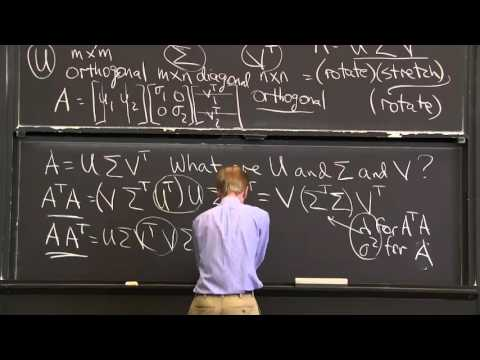

In [0]:
YouTubeVideo("mBcLRGuAFUk")


### Number of Factors and RMSE
For the demonstrative purpose, let's examine the effect of number of latent factors *k* on the model's performance. Specifically, it is possible to visually observe the effect of multiple factors on error measurement. As in supervised machine learning, `cross_validate` computes the error rate for each fold. The following function computes the average of RMSE given by the five folds and append the empty list `rmse_svd`. Consequently, the list contains 100 measures of min RMSE given 100 consecutive values of *k* in each test set, and by five folds in every iteration.

In [0]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

0.0015829191458780407

In [0]:
rmse_svd = rmse_vs_factors(SVD,data)

rmse_svd = [0.8640701175512149,
 0.8638769168745929,
 0.8637510800022202,
 0.8647810806707433,
 0.8630269836485123,
 0.8645231696291852,
 0.8637202865052265,
 0.8653130504980988,
 0.8651309812188954,
 0.8639277704232035,
 0.8643845731386314,
 0.8642636198723611,
 0.8636404957627614,
 0.8635472186317541,
 0.8630540896887444,
 0.8646289674927801,
 0.8644148449973146,
 0.8647752962643429,
 0.863489924117179,
 0.863763619597148,
 0.8643895617697609,
 0.8641200537928475,
 0.8646901769902537,
 0.8645757957332838,
 0.8645621484022519,
 0.8643118397484937,
 0.8639517832384405,
 0.8640837187371281,
 0.8648788040001444,
 0.8638063897068632,
 0.8643820853322743,
 0.8645563355224608,
 0.8651725056535128,
 0.864356770471665,
 0.8656419522972746,
 0.8649302076143298,
 0.8650170850424029,
 0.8645597711881864,
 0.8651011379056058,
 0.8647809429792133,
 0.8661189481648073,
 0.8661791376317639,
 0.8643815017493012,
 0.8659318947507512,
 0.8647480138846344,
 0.8650681506913702,
 0.8656506614550313,
 0.8671811414913503,
 0.8649275326436274,
 0.8653892480907641,
 0.8659947430690075,
 0.8657821886109553,
 0.8656940431350156,
 0.8661001767642794,
 0.865329747917665,
 0.8666047277731541,
 0.8665283804727393,
 0.8665915831159445,
 0.8659327377047557,
 0.8665539602291151,
 0.8666357195464511,
 0.8673224716233283,
 0.867036524441761,
 0.8660014404420344,
 0.8667166574098978,
 0.8659754499720138,
 0.8674286308406585,
 0.8675490242058274,
 0.866633608542902,
 0.8664741597754334,
 0.8664317605017235,
 0.8673299208700309,
 0.8671319233322382,
 0.8671429237325567,
 0.8664256053126766,
 0.8679146766340861,
 0.8677858958340812,
 0.867597655821787,
 0.8686809637510067,
 0.8679273780074167,
 0.8664259739840302,
 0.8679787189877921,
 0.8665574263449825,
 0.8676223830619524,
 0.8681878149881633,
 0.8682312682072594,
 0.867325228557496,
 0.8673038423874285,
 0.8673592821589556,
 0.8687979636935749,
 0.8687294198724587,
 0.8672159187083015,
 0.8684596466846152,
 0.8676192448622961,
 0.866750291350608,
 0.8694681891285112,
 0.8679087028033148,
 0.8692892067985749,
 0.8683058318549207,
 0.8681572516418437]

To replicate the plot of performance for each subsequent model, the following chunk defines the function `plot_rmse()` with two arguments where `rmse` is a list of float values and `algorithm` is an instantiated matrix factorization model. The function returns a plot with two line subplots that display performance vs. numbers of factors. The second subplot only zooms in and marks *k* with the best performance, i.e. the minimum RMSE.

In [0]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

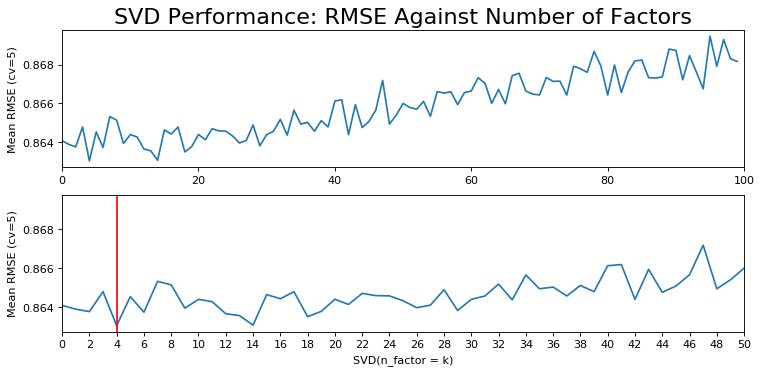

In [0]:
plot_rmse(rmse_svd,"SVD")

According to the figure, there is an increasing trend of worse performance with higher *k*. The lowest RMSE is achieved when $k=4$. However, it is worth mentioning that $k=14$ is also very close to the  RMSE achieved with only 4 latent factors. Besides, the author argues that it is not probable that the user's taste (rating) is determined by such a low number of factors. On the other hand, the result suggests a range of values which can be used in `GridSearchCV()`for  parameter tunning. 

### GridsearchCV (Sample)



In [0]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8639552777419859
{'n_factors': 11}


To make the model generalizable, i.e. avoid over and underfitting, the grid algorithm finds  `n_factors = 11`  optimal. 

### Training SVD Algorithm and Predictions
Next, `SVD(n_factors = 11)` fits the model on `trainset`. To predict values, i.e. ratings, for each empty element $a_{ij}$ in the utility matrix, it is essential to specify: a.) the users and b.) particular movies that **are not** in the trainset. `build_anti_testset()` method of `trainset` accomplishes the goal. It returns a list of ratings (`testset`) that are **not** in the trainset or in the entire utility matrix $R$. Consequently, it is possible to use the fitted model and predict ratings for movies in `testset`. `algo_SVD.test(testset)`returns the list with predictions.

In [0]:
algo_SVD = SVD(n_factors = 11)
algo_SVD.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid=1, iid=318, r_ui=3.5110432282575212, est=5, details={'was_impossible': False}),
 Prediction(uid=1, iid=1704, r_ui=3.5110432282575212, est=4.953822490465707, details={'was_impossible': False})]

### Prediction and Historical Reference
As is mentioned above, the raw predictions are stored in a list. It would also be difficult to search for any `userId` and predictions with meaningful information. For example, let's assume there are two goals: i.) suggest any `userId` the top 10 unseen movies the person is likely to enjoy and ii.) recommend the user movies with titles and genres. Overall, it was the author's objective  to define a function with the following properties:
 
 * Map the predictions to each user.
 
 * Return: i.) recommendations for any given `userId` and ii.) the user's historical ratings 
 
 * Return the above objects with specific reference to the movie and its genre in a readable format (i.e. tidy DataFrame) 
 
The below function `get_top_n()` accomplishes the goals. The function takes five arguments.  Specifically, `predictions` is the list with predictions (`predictions = algo_SVD.test(testset)`
) , `userId` is an arbitrary user's id, `movies_df` is DataFrame with title and genre to each `movieId`, `ratings_df` contains historical ratings, and `n` specifies how many movies should be recommended to the user. By default, `n` is set to 10.
`get_top_n()` consists of two main parts:
\
\
Part I. comes from the official Surprise documentation. It maps the prediction to each user, sorts them in descending order, and returns the top n (by default 10) recommended movies for the `userId` specified as the argument of the function. 
\
\
Part II. was inspired by an [article](https://beckernick.github.io/matrix-factorization-recommender/) published by IVIDIA data scientist Nick Becker on his blog. It prints the total number of movies rated by the user. Then, it merges the DataFrame objects, i.e. history and predictions, on `movieID` in `movies_df`. Therefore, besides `movieId` both objects consequently contain `title` and `genres`. One can then *holistically* evaluate the model's performance on an individual level because the function's output (data frames) allows to observing both the highest rated predictions and the highest rated movies in the past. It is assumed that high rated genres should correspond to the user's taste and are therefore expected to appear in the recommended movies as well.

In [0]:
def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

### SVD Recommendations
Since the model was properly trained, it is already possible to suggest any `userID` `n` movies at this stage. Additionally, based on the acquired predictions and defined `get_top_n()` function it is reasonable to visually inspect the recommended movies and the user's highest rated movies in the past. For instance, let's assume the `userId` 124 wants to watch a movie at their earliest convenience but has no specific title in mind. On top of that, the movie database contains over 6,000 titles across multiple genres so the user would spend a lot of time researching for what movies are in line with respect to their **specific preferences**. The following code makes the user's choice much easier. After calling `get_top_n()` function, it is immediately obvious the user 124 has already rated 50 movies.

In [0]:
hist_SVD_124, pred_SVD_124 = get_top_n(predictions, movies_df = movies_df, userId = 124, ratings_df = ratings_df)

To see the user's history, let's examine their top 15 highest rated movies. The ratings are in the range from 5 to 4.5. As the table below shows, the user 124 enjoys a wide range of genres. Specifically, the highest rated movies (rating 5) are mostly dramas. Additionally, the user has mostly rated comedies, thrillers, and action/adventure movies.

In [0]:
hist_SVD_124.head(15)

,userId,movieId,rating,title,genres
0,124,1358,5.0,Sling Blade (1996),Drama
1,124,3949,5.0,Requiem for a Dream (2000),Drama
2,124,7361,5.0,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
3,124,6377,5.0,Finding Nemo (2003),Adventure|Animation|Children|Comedy
4,124,2858,5.0,American Beauty (1999),Drama|Romance
5,124,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War
6,124,608,5.0,Fargo (1996),Comedy|Crime|Drama|Thriller
7,124,3252,4.5,Scent of a Woman (1992),Drama
8,124,1210,4.5,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
9,124,1196,4.5,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


When it comes to predictions, the outcome is stored in the same order and format as the user's history.

In [0]:
pred_SVD_124

,userId,movieId,rat_pred,title,genres
0,124,750,4.610126,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
1,124,1136,4.545477,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
2,124,904,4.541237,Rear Window (1954),Mystery|Thriller
3,124,1208,4.537614,Apocalypse Now (1979),Action|Drama|War
4,124,1204,4.535593,Lawrence of Arabia (1962),Adventure|Drama|War
5,124,56782,4.517568,There Will Be Blood (2007),Drama|Western
6,124,1225,4.513478,Amadeus (1984),Drama
7,124,898,4.512611,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
8,124,2959,4.510696,Fight Club (1999),Action|Crime|Drama|Thriller
9,124,2160,4.499703,Rosemary's Baby (1968),Drama|Horror|Thriller


Comparing the predictions with history, one can observe that the genres are in line with the user's taste.


## Non-Negative Matrix Factorization (NMF)

NMF is another method used for matrix factorization. Contrary to SVD, NMF decomposes the **non-negative** utility matrix R into the product of matrices *W* and *H* :
\
$R_{n*d} = W_{n*r} H_{r*d}$**

Where columns in matrix $W_{n*r}$ represent components, while matrix $H_{r*d}$ stores the corresponding weights. More importantly,  NMF introduces constraints under which: $W \geq 0$ and $H \geq 0$. The component-wise nonnegativity is a substantial difference from SVD (Gillis, 2017). Additionally to collaborative filtering, one can find use cases of NMF in clustering, image processing,  or music analysis. 



In [0]:
rmse_nmf = rmse_vs_factors(NMF, data)

rmse_nmf = [1.239782822952058,
 1.145087209117493,
 1.0854635116716076,
 1.0405732547679698,
 1.0073998220878857,
 0.9825474114158645,
 0.9629831819646153,
 0.9503197405498189,
 0.941723724787655,
 0.93103722875328,
 0.9250345859580275,
 0.9205044571109072,
 0.9190925624421539,
 0.9134486219549748,
 0.9095023561491031,
 0.910928336703822,
 0.9141241663863422,
 0.9136312187251162,
 0.9110706812732798,
 0.9119946693838547,
 0.9113302146000736,
 0.9151502166548797,
 0.9164239495535546,
 0.917747138742739,
 0.9165389369520422,
 0.9224306063288829,
 0.9239375567087572,
 0.9253636558186227,
 0.9235688838816556,
 0.9282819563005145,
 0.9299038467565449,
 0.9286347885256279,
 0.9347808358992848,
 0.9339730893849107,
 0.9353684177842178,
 0.9377572023004065,
 0.9399829374347304,
 0.9413102316900306,
 0.9429258086594837,
 0.9467011321836487,
 0.9476715151250168,
 0.9481893776584258,
 0.949560742922116,
 0.9496810012435416,
 0.9535525669335423,
 0.9536852638020068,
 0.9564301051361058,
 0.9603477787610192,
 0.9615383242960899,
 0.9601957320782016,
 0.9626955017917123,
 0.9649405115042422,
 0.9679175340754307,
 0.967449051274744,
 0.9690024472355286,
 0.970566550870171,
 0.9729455005406855,
 0.9740412364564733,
 0.9756740536107325,
 0.978480534392116,
 0.9793163926564159,
 0.9804428083426538,
 0.9809727723038186,
 0.9815160774659679,
 0.9836795302623711,
 0.9871387436341212,
 0.9864987439233628,
 0.9900425516232036,
 0.992571332743793,
 0.9900404914471681,
 0.9934724181712771,
 0.9933135168113415,
 0.994440480142847,
 0.9941281964845897,
 0.998515065496824,
 1.001095318045905,
 0.9983341454028022,
 1.0004238299161874,
 1.002370202671844,
 1.0045104151198208,
 1.0052049470986666,
 1.0055206099507945,
 1.0068772934396208,
 1.007776844525674,
 1.0099949854374335,
 1.011386942297211,
 1.0113190459967674,
 1.0125958027827153,
 1.015780558634231,
 1.0152870149354833,
 1.0150108622407261,
 1.0168559920309128,
 1.0174746689954806,
 1.0200335713290931,
 1.0203143265619685,
 1.021470805444603,
 1.0217795159661809,
 1.0231568803147137,
 1.0236554944013325,
 1.026468725242489]

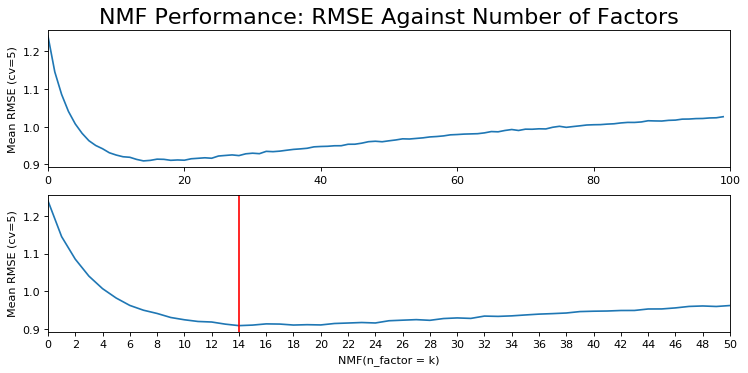

In [0]:
plot_rmse(rmse_nmf, "NMF")

In [0]:
param_grid = {'n_factors': [11,14,15,16,17,18,20]}
gs = GridSearchCV(NMF, param_grid, measures=['rmse'], cv=5)
gs.fit(data)



# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8861525979842921
{'n_factors': 17}


In [0]:
algo_NMF = NMF(n_factors = 16)
algo_NMF.fit(trainset)


# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo_NMF.test(testset)

In [0]:
hist_NMF_124, pred_NMF_124 = get_top_n(predictions, movies_df = movies_df, userId = 124, original_ratings_df = ratings_df)

User 124 has already rated 50 movies.


In [0]:
pred_NMF_124

,userId,movieId,rat_pred,title,genres
0,124,2324,4.604147,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
1,124,1089,4.558471,Reservoir Dogs (1992),Crime|Mystery|Thriller
2,124,1213,4.548465,Goodfellas (1990),Crime|Drama
3,124,1248,4.544143,Touch of Evil (1958),Crime|Film-Noir|Thriller
4,124,1104,4.541697,"Streetcar Named Desire, A (1951)",Drama
5,124,750,4.536357,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
6,124,904,4.530793,Rear Window (1954),Mystery|Thriller
7,124,1235,4.526960,Harold and Maude (1971),Comedy|Drama|Romance
8,124,1242,4.517884,Glory (1989),Drama|War
9,124,898,4.512130,"Philadelphia Story, The (1940)",Comedy|Drama|Romance


# Conclusion
The article discussed the “fundamentals of recommender systems and their classification”. Moreover, the author showed how to use Surprise package for two matrix factorization approaches. Among them, SVD achieved slightly lower RMSE (0.864), and therefore performed better, compared to measured RMSE (0.886) by NMF. Both models were hyper parametrized for several latent factors used in training of the algorithms. In addition, the authors showed how to evaluate the models on an individual level by observing the predicted movies and the user's historical rating.

# Citation

Lineberry, A., & Longo, C. (2018, September 11). Creating a hybrid content-collaborative movie recommender using deep learning. Retrieved from https://towardsdatascience.com/creating-a-hybrid-content-collaborative-movie-recommender-using-deep-learning-cc8b431618af

Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

Gillis, N. (2014). The why and how of nonnegative matrix factorization (2). Retrieved from https://arxiv.org/abs/1401.5226v2

Guruswami, V., & Kannan, R. (2012). Singular value decomposition (SVD). In Computer science theory for the information age (pp. 111-135).

Sarwar, Badrul & Badrul, & Karypis, George & Cybenko, George & Konstan, & Joseph, & Reidl, & Tsibouklis, John. (2001). Item-based collaborative filtering recommendation algorithmus. 